## Usage and User Analysis of Ford GoBike System  
## by Xiangning Bu

## Investigation Overview

> In the current data analysis, I aim to find out which features contribute to the usage of Ford Gobike bikes, by exploring the relationship between duration time with several factors, such as gender, user type and day of week. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system (Ford GoBike) covering the greater San Francisco Bay area. After primary data evaluation and removing the outliers, the current dataset collected 173281 trips of Ford GoBike, which contains 15 varialbles with corrected datatypes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df2= pd.read_csv('201902-fordgobike-tripdata-updated.csv')
df2

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
0,6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,3
1,9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,3
2,10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,3
3,11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993.0,Male,No,3
4,12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990.0,Male,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173276,183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,4
173277,183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,4
173278,183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,4
173279,183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,4


## Usage frequency and  user population analysis

- Most of the trip times are between 100 to 1500 sec.
- By subcription, more than 90% of user are subscribers and customer is less than 10%
- Among gender types, most of users are male (71.8%)
- During the whole week, less bikes are used on Friday and Saturday than other day of week. 

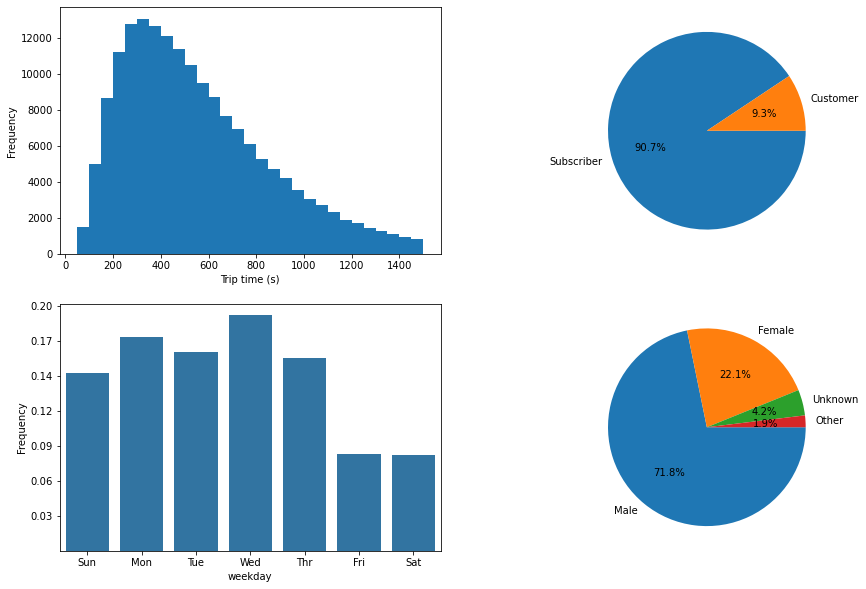

In [3]:
plt.figure(figsize = [15, 10])
color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
bin1= np.arange(50,1550, 50)
plt.hist(data=df2, x= 'duration_sec',bins= bin1)
plt.xlabel('Trip time (s)')
plt.ylabel('Frequency');

plt.subplot(2, 2, 2)
sorted_counts = df2['user_type'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);


plt.subplot(2, 2, 4)
sorted_counts = df2['member_gender'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);

plt.subplot(2, 2, 3)
yticks=[5000,10000,15000,20000,25000,30000,35000]
ylabel=[]
for x in yticks:
    x=x/df2.shape[0]
    ylabel.append(x)   
ylabels = ['{:.2f}'.format (x) for x in ylabel ]
color1 = sb.color_palette()[0]
sb.countplot(data= df2, x= 'weekday',color=color1)
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label)
plt.yticks(yticks,ylabels)
plt.ylabel('Frequency');

## Top 10 start and end stations  where bikes are most used

### 1. Ride frequency 
### 2. Locations


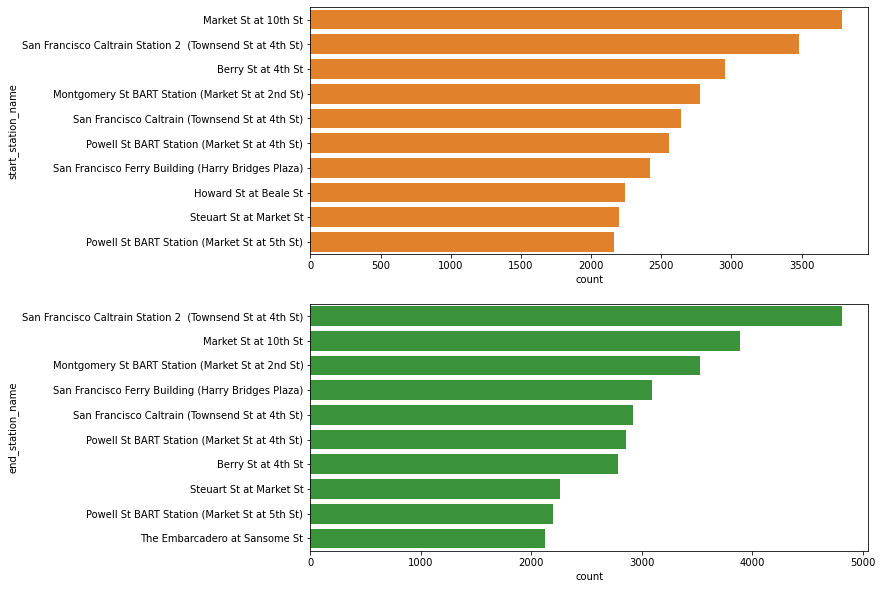

In [4]:
# Top 10 start and end stations
df2.start_station_id.value_counts()
df2.end_station_id.value_counts()

top10_start= df2.start_station_id.value_counts().nlargest(10).index
top10_end = df2.end_station_id.value_counts().nlargest(10).index

df_top10_start = df2[df2['start_station_id'].isin(top10_start)]
df_top10_end = df2[df2['end_station_id'].isin(top10_end)]

plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 1)
color2 = sb.color_palette()[1]
sb.countplot(data= df_top10_start, y= 'start_station_name',color=color2, order=df_top10_start.start_station_name.value_counts().index );

plt.subplot(2, 1, 2)
color3 = sb.color_palette()[2]
sb.countplot(data= df_top10_end, y= 'end_station_name',color=color3,order=df_top10_end.end_station_name.value_counts().index );

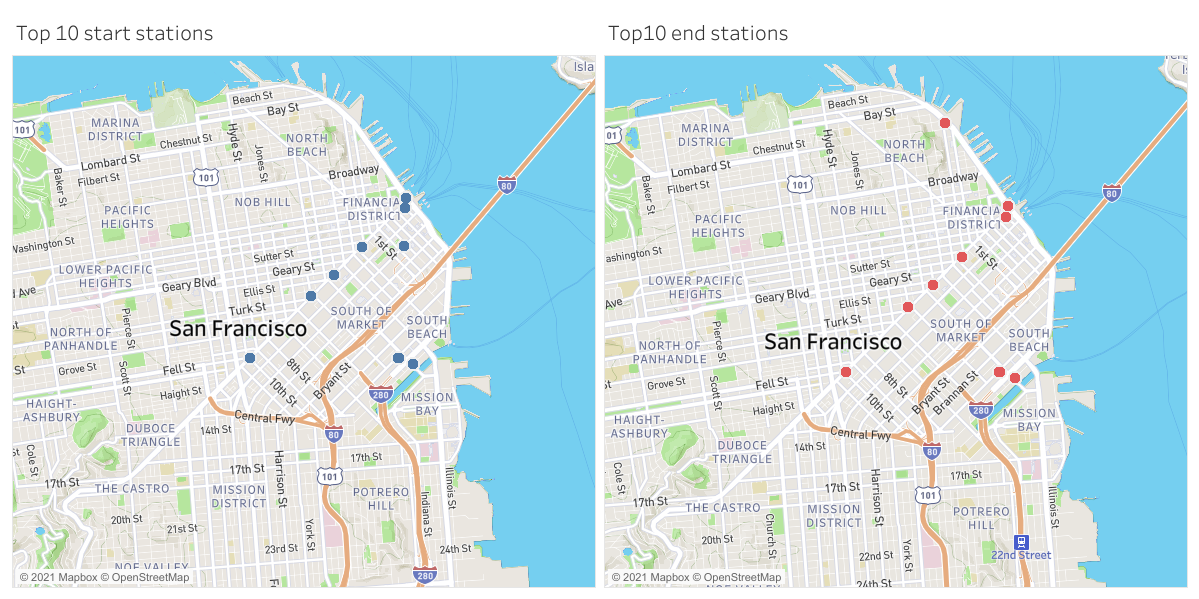

## Average Trip Time (ATT)

- Although with less usage frequency, customers have longer ATT than subscribers
- ATT across genders and day of week are similar
- There are much more males than females in both subscriber and customers


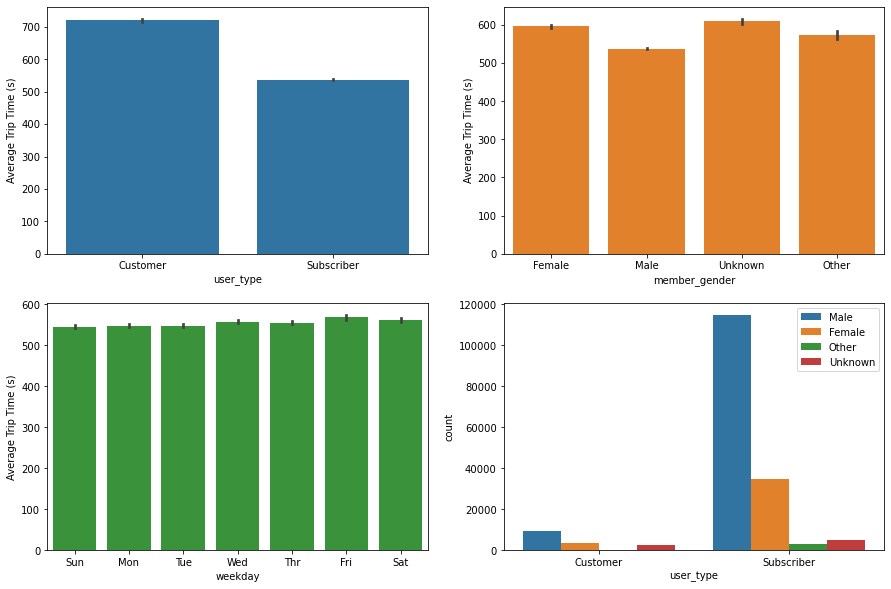

In [5]:
plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
color1 = sb.color_palette()[0]
orders= ['Customer','Subscriber']
sb.barplot(data=df2, x= 'user_type', y= 'duration_sec', color=color1,order=orders);
plt.ylabel('Average Trip Time (s)');

plt.subplot(2, 2, 2)
sb.barplot(data=df2, x= 'member_gender', y= 'duration_sec', color=color2)
plt.ylabel('Average Trip Time (s)');

plt.subplot(2, 2, 3)
sb.barplot(data=df2, x= 'weekday', y= 'duration_sec', color=color3);
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label);
plt.ylabel('Average Trip Time (s)');


plt.subplot(2, 2, 4)
orders= ['Customer','Subscriber']
hue_orders=['Male','Female','Other','Unknown']
sb.countplot(data= df2, x= 'user_type', hue= 'member_gender', order=orders, hue_order=hue_orders);
plt.legend();

##   After breaking down by gender and weekday, customers still have longer ATT than subscirbes

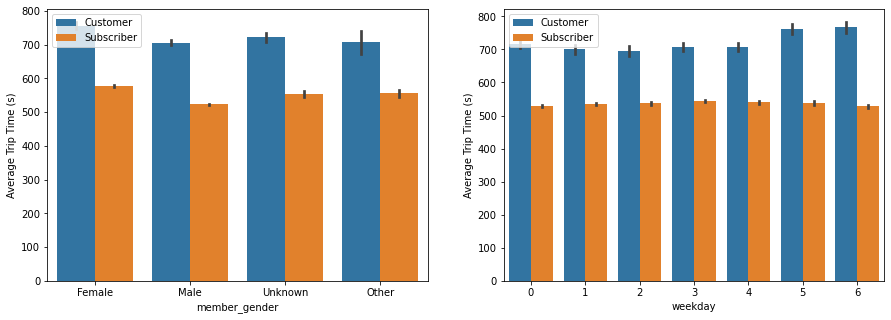

In [6]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df2, x= 'member_gender', y= 'duration_sec',  hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)')
plt.legend(loc='upper left');

plt.subplot(1, 2, 2)
sb.barplot(data=df2, x= 'weekday', y= 'duration_sec', hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)')
plt.legend(loc='upper left');

## Summary 

- After plot the distribution of all trip time, I found that most of trip time was between 60 to 1500 seconds.
- User analysis revealed there were much more subscribers than customers, and more males users than females users. - Also, these bikes were more frequently used on Sun to Thu than Fri and Sta. 
- However, comparation of average trip time showed that there were no much difference between male and females and among day of week.
- In surprise, the average trip time is longer in customers than subscribers.


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [7]:
! jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\xiangning\anaconda3\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\xiangning\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\xiangning\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\xiangning\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\xiangning\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\xiangning\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.expor